# Carbon Dioxide Insights

### Imports

In [1]:
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


with zipfile.ZipFile("carbon-co2-emissions.zip", 'r') as zip_ref:
    zip_ref.extractall("carbon_co2_emissions")
file_path = "carbon_co2_emissions/Carbon_(CO2)_Emissions_by_Country.csv"  
data = pd.read_csv(file_path)
df = pd.DataFrame(data)

### Data Exploration

In [2]:

df.describe()


,Kilotons of Co2,Metric Tons Per Capita
count,5.677000e+03,5677.000000
mean,1.412292e+05,4.325505
std,6.491258e+05,5.503834
min,0.000000e+00,0.000000
25%,1.380000e+03,0.570000
50%,9.170000e+03,2.360000
75%,5.848000e+04,6.340000
max,1.070722e+07,47.650000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5677 entries, 0 to 5676
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 5677 non-null   object 
 1   Region                  5677 non-null   object 
 2   Date                    5677 non-null   object 
 3   Kilotons of Co2         5677 non-null   float64
 4   Metric Tons Per Capita  5677 non-null   float64
dtypes: float64(2), object(3)
memory usage: 221.9+ KB


In [4]:
df.head()

,Country,Region,Date,Kilotons of Co2,Metric Tons Per Capita
0,Afghanistan,Asia,01-01-2011,8930.0,0.31
1,Afghanistan,Asia,01-01-2012,8080.0,0.27
2,Afghanistan,Asia,01-01-2010,7110.0,0.25
3,Afghanistan,Asia,01-01-2019,6080.0,0.16
4,Afghanistan,Asia,01-01-2018,6070.0,0.17


In [5]:
df.tail()

,Country,Region,Date,Kilotons of Co2,Metric Tons Per Capita
5672,Zimbabwe,Africa,01-01-2004,9770.0,0.80
5673,Zimbabwe,Africa,01-01-2007,9760.0,0.78
5674,Zimbabwe,Africa,01-01-2010,9600.0,0.75
5675,Zimbabwe,Africa,01-01-2009,7750.0,0.61
5676,Zimbabwe,Africa,01-01-2008,7600.0,0.61


In [6]:
print("Number of Rows: ",df.shape[0] , "Number of Columns: ",df.shape[1])

Number of Rows:  5677 Number of Columns:  5


In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Kilotons of Co2,5677.0,141229.164974,649125.822199,0.0,1380.00,9170.00,58480.00,10707219.73
Metric Tons Per Capita,5677.0,4.325505,5.503834,0.0,0.57,2.36,6.34,47.65


In [8]:
df.isnull().sum()

Country                   0
Region                    0
Date                      0
Kilotons of Co2           0
Metric Tons Per Capita    0
dtype: int64

In [9]:
duplicates = df.duplicated()
print(duplicates.sum())

0


### Data Pre-Processing

In [10]:

df = df.rename(columns={"Region":"Continent"})
Continent =df['Continent'].unique()
print(Continent)


['Asia' 'Europe' 'Africa' 'Americas' 'Oceania']


In [11]:
total_emissions = df['Kilotons of Co2'].sum()
print("Total Emissions" , total_emissions)
average_emissions = df['Kilotons of Co2'].mean();
print("Average Emissions " , average_emissions)
top_countries_emission = df.groupby('Country')['Kilotons of Co2'].sum().sort_values(ascending=False).head(5)
print("Top Country In Emissions " , top_countries_emission.index[0])
top_countries_emission.head()

Total Emissions 801757969.56
Average Emissions  141229.16497445834
Top Country In Emissions  China


Country
China            1.807228e+08
United States    1.583179e+08
Russia           5.002867e+07
India            3.988273e+07
Japan            3.507659e+07
Name: Kilotons of Co2, dtype: float64

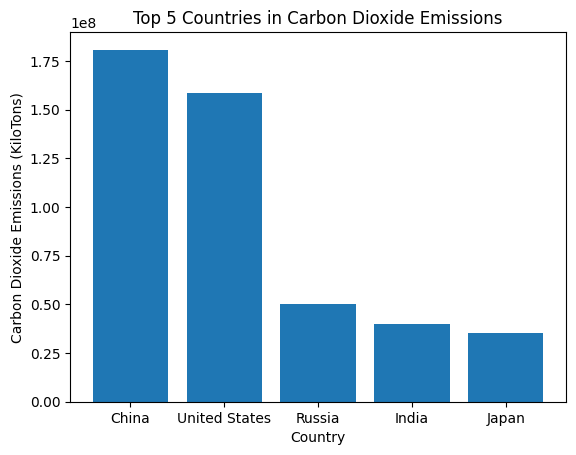

In [12]:
emissions = top_countries_emission
top_five_countries = top_countries_emission.index
plt.bar(top_five_countries,emissions)
plt.title("Top 5 Countries in Carbon Dioxide Emissions")
plt.xlabel("Country")
plt.ylabel("Carbon Dioxide Emissions (KiloTons)")
plt.show()

([<matplotlib.patches.Wedge at 0x28b7fcf9160>,
 [Text(-0.8120019113849667, -0.7420599004845639, 'Asia'),
  Text(1.0918600325608545, -0.1335727116450431, 'Americas'),
  Text(0.16309743722988113, 1.087841544513283, 'Europe'),
  Text(-0.6815330537032322, 0.8634307712318037, 'Africa'),
  Text(-0.809890708530255, 0.7443635135042298, 'Oceania')])

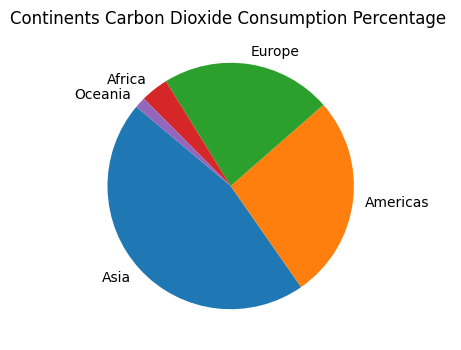

In [13]:
top_continents_emission = df.groupby('Continent')['Kilotons of Co2'].sum().sort_values(ascending=False).head()

plt.figure(figsize=(4,4))
plt.title("Continents Carbon Dioxide Consumption Percentage ")
plt.pie(top_continents_emission,labels=top_continents_emission.index,startangle=140)